In [1]:
!pip install transformers -q
!pip install yfinance -q
!pip install snscrape -q  #social media scrapper; Facebook, Instagram, Twitter, Telegram

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [3]:
nvda=yf.Ticker("NVDA")
print(nvda.info)

{'address1': '2788 San Tomas Expressway', 'city': 'Santa Clara', 'state': 'CA', 'zip': '95051', 'country': 'United States', 'phone': '408 486 2000', 'website': 'https://www.nvidia.com', 'industry': 'Semiconductors', 'industryKey': 'semiconductors', 'industryDisp': 'Semiconductors', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': "NVIDIA Corporation provides graphics, and compute and networking solutions in the United States, Taiwan, China, and internationally. The company's Graphics segment offers GeForce GPUs for gaming and PCs, the GeForce NOW game streaming service and related infrastructure, and solutions for gaming platforms; Quadro/NVIDIA RTX GPUs for enterprise workstation graphics; vGPU software for cloud-based visual and virtual computing; automotive platforms for infotainment systems; and Omniverse software for building 3D designs and virtual worlds. Its Compute & Networking segment provides Data Center platforms and syste

In [4]:
nvda_info=nvda.info
nvda_info.keys()

dict_keys(['address1', 'city', 'state', 'zip', 'country', 'phone', 'website', 'industry', 'industryKey', 'industryDisp', 'sector', 'sectorKey', 'sectorDisp', 'longBusinessSummary', 'fullTimeEmployees', 'companyOfficers', 'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk', 'governanceEpochDate', 'compensationAsOfEpochDate', 'maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh', 'regularMarketPreviousClose', 'regularMarketOpen', 'regularMarketDayLow', 'regularMarketDayHigh', 'dividendRate', 'dividendYield', 'exDividendDate', 'payoutRatio', 'fiveYearAvgDividendYield', 'beta', 'trailingPE', 'forwardPE', 'volume', 'regularMarketVolume', 'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day', 'bid', 'ask', 'bidSize', 'askSize', 'marketCap', 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'priceToSalesTrailing12Months', 'fiftyDayAverage', 'twoHundredDayAverage', 'trailingAnnualDividendRate', 'trailingAnnualDividendYield', 'currency', 'enterpri

In [5]:
nvda_info['totalRevenue']

44870000640

In [6]:
nvda_hist=nvda.history(period="max")
print(nvda_hist.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
1999-01-22 00:00:00-05:00  0.401338  0.447922  0.355949  0.376255  271468800   
1999-01-25 00:00:00-05:00  0.406116  0.420450  0.376255  0.415672   51048000   
1999-01-26 00:00:00-05:00  0.420450  0.428811  0.377449  0.383422   34320000   
1999-01-27 00:00:00-05:00  0.384616  0.394172  0.363115  0.382227   24436800   
1999-01-28 00:00:00-05:00  0.382228  0.384616  0.378643  0.381033   22752000   

                           Dividends  Stock Splits  
Date                                                
1999-01-22 00:00:00-05:00        0.0           0.0  
1999-01-25 00:00:00-05:00        0.0           0.0  
1999-01-26 00:00:00-05:00        0.0           0.0  
1999-01-27 00:00:00-05:00        0.0           0.0  
1999-01-28 00:00:00-05:00        0.0           0.0  


<Axes: title={'center': 'Nvidia Stock Price'}, xlabel='Date'>

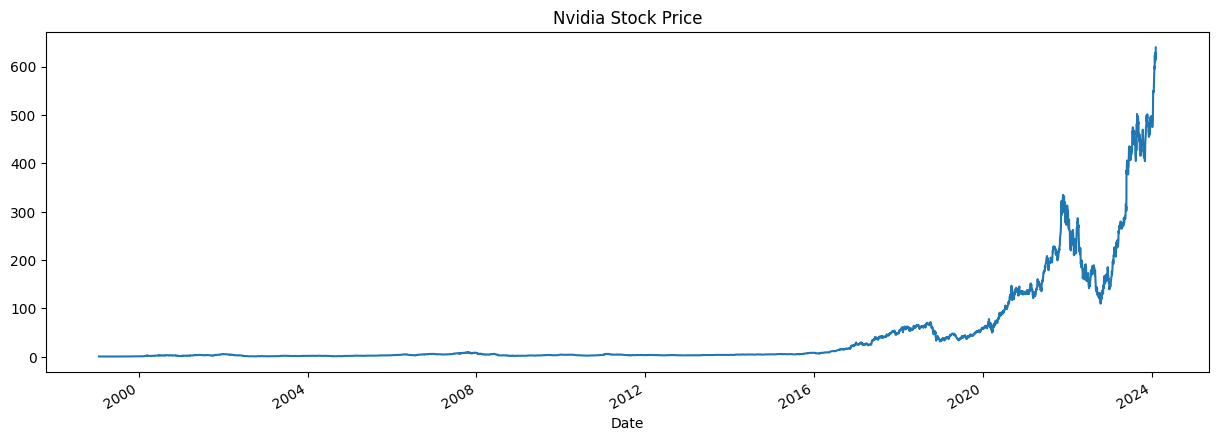

In [7]:
nvda_hist["Open"].plot(figsize=(15,5),title="Nvidia Stock Price")

In [8]:
stocks = [
    "NVDA",
    "PINS",
    "TSLA",
    "SHOP",
    "O",
    "NKE",
    "GOOG",
    "META",
    "MSFT",
    "AMZN",
    "ZM",
    "PFE",
    "MRNA",
    "SPOT",
    "TMUS",
]

In [9]:
hists={}
for s in stocks:
    tkr=yf.Ticker(s)
    history=tkr.history(period="3y")
    hists[s]=history

In [10]:
len(hists)

15

In [11]:
hists["NVDA"].index.min()

Timestamp('2021-02-03 00:00:00-0500', tz='America/New_York')

In [12]:
for stock in stocks:
    temp_df = hists[stock].copy()

    fig = go.Figure(
        data=[
            go.Candlestick(
                x=temp_df.index,
                open=temp_df["Open"],
                high=temp_df["High"],
                low=temp_df["Low"],
                close=temp_df["Close"],
            )
        ]
    )

    fig.update_layout(
        margin=dict(l=20, r=20, t=60, b=20),
        height=300,
        paper_bgcolor="LightSteelBlue",
        title=stock,
    )

    fig.show()

In [13]:
#!pip install playwright jmespath scrapfly-sdk

In [14]:
#from playwright.sync_api import sync_playwright
#!playwright install

In [15]:
#!apt-get install libgbm1 -y

In [16]:
#import asyncio
#from playwright.async_api import async_playwright

#async def scrape_tweet(url: str) -> list:
    #_xhr_calls = []

    #def intercept_response(response):
        #if response.request.resource_type == "xhr":
            #_xhr_calls.append(response)
        #return response

    #async with async_playwright() as pw:
        #browser = await pw.chromium.launch(headless=True)
        #context = await browser.new_context(viewport={"width": 1920, "height": 1080})
        #page = await context.new_page()

        #page.on("response", intercept_response)

        #await page.goto(url)
        #await page.wait_for_selector("[data-testid='tweet']")

        #tweet_results = []

        #tweet_calls = [f for f in _xhr_calls if "TweetResultByRestId" in f.url]
        #for xhr in tweet_calls:
            #data = await xhr.json()
            #tweet_results.append(data['data']['tweetResult']['result'])

        #return tweet_results

# Use gather to run the coroutine in the existing event loop
#results = await asyncio.gather(scrape_tweet("https://twitter.com/Scrapfly_dev/status/1664267318053179398"))

# Print the results or do further processing
#print(results[0])

In [17]:
# from typing import Dict
# import jmespath
# def parse_tweet(data: Dict) -> Dict:
#     """Parse Twitter tweet JSON dataset for the most important fields"""
#     result = jmespath.search(
#         """{
#         created_at: legacy.created_at,
#         attached_urls: legacy.entities.urls[].expanded_url,
#         attached_urls2: legacy.entities.url.urls[].expanded_url,
#         attached_media: legacy.entities.media[].media_url_https,
#         tagged_users: legacy.entities.user_mentions[].screen_name,
#         tagged_hashtags: legacy.entities.hashtags[].text,
#         favorite_count: legacy.favorite_count,
#         bookmark_count: legacy.bookmark_count,
#         quote_count: legacy.quote_count,
#         reply_count: legacy.reply_count,
#         retweet_count: legacy.retweet_count,
#         quote_count: legacy.quote_count,
#         text: legacy.full_text,
#         is_quote: legacy.is_quote_status,
#         is_retweet: legacy.retweeted,
#         language: legacy.lang,
#         user_id: legacy.user_id_str,
#         id: legacy.id_str,
#         conversation_id: legacy.conversation_id_str,
#         source: source,
#         views: views.count
#     }""",
#         data,
#     )
#     result["poll"] = {}
#     poll_data = jmespath.search("card.legacy.binding_values", data) or []
#     for poll_entry in poll_data:
#         key, value = poll_entry["key"], poll_entry["value"]
#         if "choice" in key:
#             result["poll"][key] = value["string_value"]
#         elif "end_datetime" in key:
#             result["poll"]["end"] = value["string_value"]
#         elif "last_updated_datetime" in key:
#             result["poll"]["updated"] = value["string_value"]
#         elif "counts_are_final" in key:
#             result["poll"]["ended"] = value["boolean_value"]
#         elif "duration_minutes" in key:
#             result["poll"]["duration"] = value["string_value"]
#     user_data = jmespath.search("core.user_results.result", data)
#     if user_data:
#         result["user"] = parse_user(user_data)
#     return result
# print (result

In [18]:
#import time
#stock = "NVDA"
#import snscrape.modules.twitter as sntwitter
#from tqdm.notebook import tqdm

# Creating list to append tweet data
#tweets_list = []
# Using TwitterSearchScraper to scrape data and append tweets to list
#for i,tweet in tqdm(
    #enumerate(
          #sntwitter.TwitterSearchScraper(
             #f"${stock} since:2020-12-21 until:2023-12-20"
         #).get_items()
     #),
     #total=10,
 #):  # declare a username
     #if i > 10:  # number of tweets you want to scrape
         #break
     #tweets_list.append(
         #[tweet.date, tweet.id, tweet.content, tweet.user.username]
     #)  # declare the attributes to be returned
 # Creating a dataframe from the tweets list above
#tweet_df = pd.DataFrame(
     #tweets_list, columns=["Datetime", "Tweet Id", "Text", "Username"]
#)

In [ ]:
tweet_df=pd.read_csv("Nvidia-Tweets.csv")

In [20]:
tweet_df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2023-02-06 10:07:17+00:00,1.622537e+18,$nvda Top analyst price target for next week ...,RyderJohnston6
1,1,2023-02-06 10:06:30+00:00,1.622537e+18,$nvda Top analyst price target for this week.🔗...,k_mebane
2,2,2023-02-06 10:06:08+00:00,1.622537e+18,$nvda Top analyst price target for next week.....,RonaldBevan2
3,3,2023-02-06 10:05:43+00:00,1.622537e+18,$NVDA Top analyst target price for next week🚀 ...,Eva077777
4,4,2023-02-06 10:03:49+00:00,1.622537e+18,$rsls rebound 🚨🚨🚀🚀🚀\n————\n\n$EDSA\n$KODK\n$DO...,MrBlackTrading


In [21]:
tweet_df.isnull().sum()

Unnamed: 0       0
Datetime       478
Tweet Id       846
Text           846
Username      1214
dtype: int64

In [22]:
tweet_df.dropna(inplace=True)

In [23]:
tweet_df.shape

(99633, 5)

In [24]:
#Sentiment analysis preprocessing
from transformers import pipeline

model = f"cardiffnlp/twitter-roberta-base-sentiment-latest"

sentiment_task = pipeline("sentiment-analysis", model=model)
sentiment_task("I do not like playing football, but sometimes I enjoy with watching football matches") #test model

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

[{'label': 'neutral', 'score': 0.4726470410823822}]

In [25]:
from tqdm.notebook import tqdm
sent_results = {}
count = 0
for i, d in tqdm(tweet_df.iterrows(), total=len(tweet_df)):
    sent = sentiment_task(d["Text"])
    sent_results[d["Tweet Id"]] = sent
    count += 1
    if count == 6000:
        break

  0%|          | 0/99633 [00:00<?, ?it/s]

In [26]:
sent_results
#TweetID----Label----Score

{1.62253740706014e+18: [{'label': 'positive', 'score': 0.6267983317375183}],
 1.6225372078474527e+18: [{'label': 'positive', 'score': 0.8709064722061157}],
 1.6225371169988608e+18: [{'label': 'positive', 'score': 0.6359903216362}],
 1.622537012158042e+18: [{'label': 'positive', 'score': 0.8311951160430908}],
 1.6225365326565908e+18: [{'label': 'positive', 'score': 0.8050739169120789}],
 1.622535627408552e+18: [{'label': 'positive', 'score': 0.8929925560951233}],
 1.622535020060545e+18: [{'label': 'positive', 'score': 0.7525844573974609}],
 1.6225344991407882e+18: [{'label': 'positive', 'score': 0.6623908877372742}],
 1.6225344084641382e+18: [{'label': 'neutral', 'score': 0.8421579599380493}],
 1.6225327903729377e+18: [{'label': 'neutral', 'score': 0.5409592390060425}],
 1.622532481948975e+18: [{'label': 'positive', 'score': 0.5875911116600037}],
 1.622529448829395e+18: [{'label': 'neutral', 'score': 0.7915418744087219}],
 1.622529447696941e+18: [{'label': 'neutral', 'score': 0.81666529

In [27]:
sent_df = pd.DataFrame(sent_results).T
sent_df["label"] = sent_df[0].apply(lambda x: x["label"])
sent_df["score"] = sent_df[0].apply(lambda x: x["score"])
print(sent_df.head())
sent_df = sent_df.merge(
    tweet_df.set_index("Tweet Id"), left_index=True, right_index=True
)
print("-----")
print(sent_df.head())

                                                              0     label  \
1.622537e+18  {'label': 'positive', 'score': 0.6267983317375...  positive   
1.622537e+18  {'label': 'positive', 'score': 0.8709064722061...  positive   
1.622537e+18    {'label': 'positive', 'score': 0.6359903216362}  positive   
1.622537e+18  {'label': 'positive', 'score': 0.8311951160430...  positive   
1.622537e+18  {'label': 'positive', 'score': 0.8050739169120...  positive   

                 score  
1.622537e+18  0.626798  
1.622537e+18  0.870906  
1.622537e+18  0.635990  
1.622537e+18  0.831195  
1.622537e+18  0.805074  
-----
                                                              0     label  \
1.622537e+18  {'label': 'positive', 'score': 0.6267983317375...  positive   
1.622537e+18  {'label': 'positive', 'score': 0.8709064722061...  positive   
1.622537e+18    {'label': 'positive', 'score': 0.6359903216362}  positive   
1.622537e+18  {'label': 'positive', 'score': 0.8311951160430...  positive

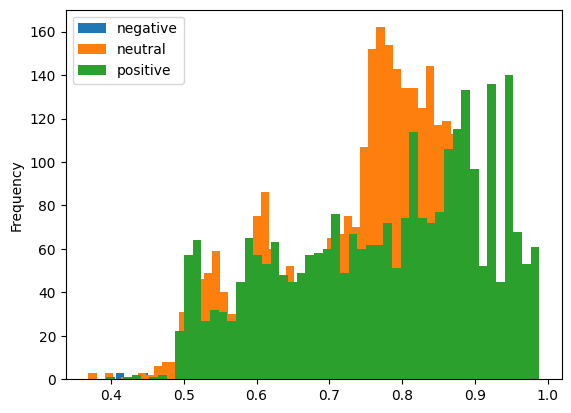

In [28]:
sent_df.groupby("label")["score"].plot(kind="hist", bins=50)
plt.legend()
plt.show()

In [29]:
sent_df.loc[sent_df["label"] == "negative", "score_"] = (sent_df.loc[sent_df["label"] == "negative"]["score"] * -1)

sent_df.loc[sent_df["label"] == "neutral", "score_"] = 0
sent_df.loc[sent_df["label"] == "positive", "score_"] = (sent_df.loc[sent_df["label"] == "positive"]["score"])
sent_df.sample(5)

,0,label,score,Unnamed: 0,Datetime,Text,Username,score_
1.621495e+18,"{'label': 'positive', 'score': 0.6057823896408...",positive,0.605782,3022,2023-02-03 13:06:24+00:00,$nvda Top analyst price target for next week.....,Eva14956515,0.605782
1.620915e+18,"{'label': 'positive', 'score': 0.5220620632171...",positive,0.522062,5281,2023-02-01 22:41:25+00:00,Semiconductor stocks continued to spike higher...,tpetruno,0.522062
1.621172e+18,"{'label': 'neutral', 'score': 0.8444981575012207}",neutral,0.844498,4364,2023-02-02 15:40:10+00:00,$TSLA for those that don’t know 🔋\n\nhttps://t...,Rahul04980546,0.000000
1.621693e+18,"{'label': 'positive', 'score': 0.9250199198722...",positive,0.925020,1958,2023-02-04 02:12:50+00:00,Great place to learn trading and to get instan...,nappedonthebed,0.925020
1.621887e+18,"{'label': 'negative', 'score': 0.7425011396408...",negative,0.742501,1563,2023-02-04 15:02:53+00:00,This is the biggest risk to $NVDA earnings! 🩸,n_hatami,-0.742501


<Axes: ylabel='Frequency'>

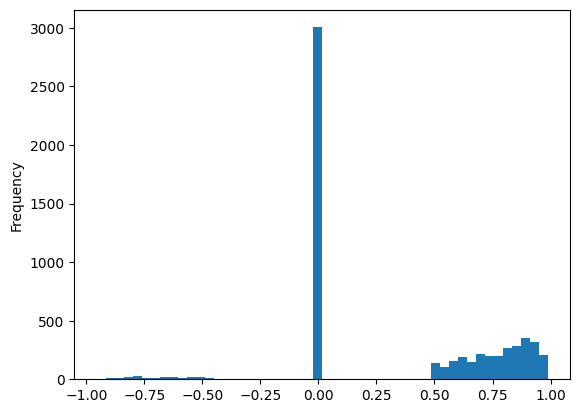

In [30]:
sent_df["score_"].plot(kind="hist", bins=50)

In [31]:
sent_df['Datetime']= pd.to_datetime(sent_df['Datetime'])

In [32]:
sent_df["Date"] = sent_df["Datetime"].dt.date

In [33]:
sent_df["Date"]

1.622537e+18    2023-02-06
1.622537e+18    2023-02-06
1.622537e+18    2023-02-06
1.622537e+18    2023-02-06
1.622537e+18    2023-02-06
                   ...    
1.620837e+18    2023-02-01
1.620837e+18    2023-02-01
1.620837e+18    2023-02-01
1.620837e+18    2023-02-01
1.620836e+18    2023-02-01
Name: Date, Length: 6000, dtype: object

In [34]:
sent_daily = sent_df.groupby("Date")["score_"].mean()
sent_daily

Date
2023-02-01    0.271574
2023-02-02    0.344259
2023-02-03    0.312561
2023-02-04    0.374356
2023-02-05    0.377917
2023-02-06    0.338722
Name: score_, dtype: float64

In [35]:
Nvidia_df = hists["NVDA"].copy()
Nvidia_df = Nvidia_df.reset_index()
Nvidia_df["Date"] = Nvidia_df["Date"].dt.date
Nvidia_df = Nvidia_df.set_index("Date")
Nvidia_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-02-03,136.053353,139.004206,134.861033,135.000717,24540800,0.0,0.0
2021-02-04,135.005713,136.427511,133.077563,136.335220,20134000,0.0,0.0
2021-02-05,136.941368,137.063591,135.152904,135.604385,16915200,0.0,0.0
2021-02-08,136.963800,144.412009,136.963800,144.062790,43462400,0.0,0.0
2021-02-09,143.085003,145.504553,141.905167,142.311752,28756000,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-29,612.320007,624.890015,609.070007,624.650024,34873300,0.0,0.0
2024-01-30,629.000000,634.929993,622.599976,627.739990,41073500,0.0,0.0
2024-01-31,614.400024,622.690002,607.000000,615.270020,45379500,0.0,0.0


In [36]:
sent_and_stock = sent_daily.to_frame("sentiment").merge(Nvidia_df, left_index=True, right_index=True)
sent_and_stock

,sentiment,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2023-02-01,0.271574,196.822676,211.826014,196.023028,209.337112,66047700,0.0,0.0
2023-02-02,0.344259,209.906862,219.392658,206.908192,216.993713,56427600,0.0,0.0
2023-02-03,0.312561,209.906861,217.353554,207.797797,210.906418,42936600,0.0,0.0
2023-02-06,0.338722,207.967716,215.604327,207.767808,210.796463,45219700,0.0,0.0


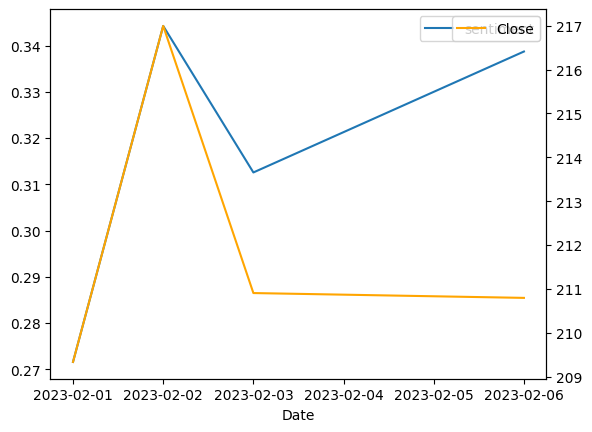

In [37]:
ax = sent_and_stock["sentiment"].plot(legend="Sentiment")
ax2 = ax.twinx()
sent_and_stock["Close"].plot(ax=ax2, color="orange", legend="Closing Price")
plt.show()

In [38]:
hists["NVDA"]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-02-03 00:00:00-05:00,136.053353,139.004206,134.861033,135.000717,24540800,0.0,0.0
2021-02-04 00:00:00-05:00,135.005713,136.427511,133.077563,136.335220,20134000,0.0,0.0
2021-02-05 00:00:00-05:00,136.941368,137.063591,135.152904,135.604385,16915200,0.0,0.0
2021-02-08 00:00:00-05:00,136.963800,144.412009,136.963800,144.062790,43462400,0.0,0.0
2021-02-09 00:00:00-05:00,143.085003,145.504553,141.905167,142.311752,28756000,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-29 00:00:00-05:00,612.320007,624.890015,609.070007,624.650024,34873300,0.0,0.0
2024-01-30 00:00:00-05:00,629.000000,634.929993,622.599976,627.739990,41073500,0.0,0.0
2024-01-31 00:00:00-05:00,614.400024,622.690002,607.000000,615.270020,45379500,0.0,0.0


<Axes: xlabel='Date'>

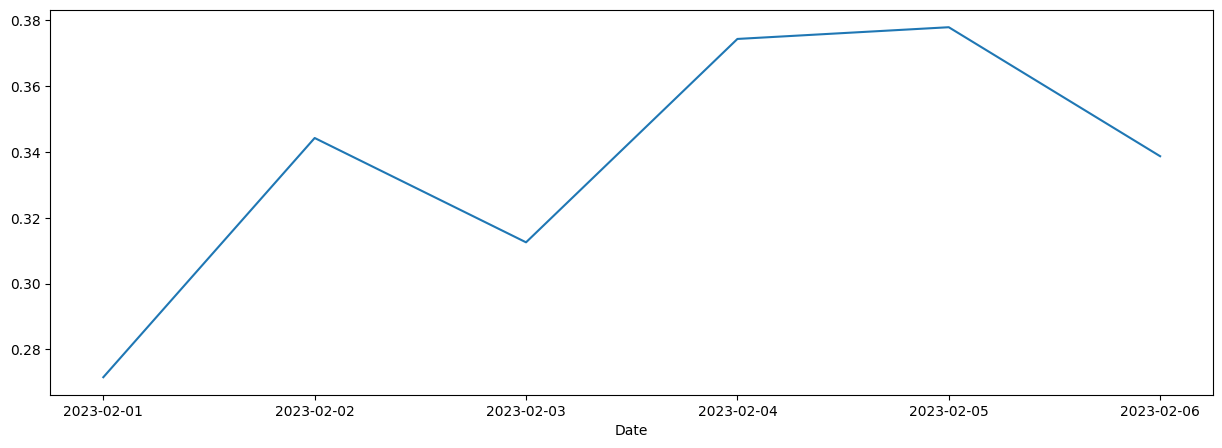

In [39]:
sent_df.groupby("Date")["score_"].mean().plot(figsize=(15,5))

In [40]:
News_df=pd.read_csv('/kaggle/input/massive-stock-news-analysis-db-for-nlpbacktests/analyst_ratings_processed.csv')
News_NVDA=News_df[News_df["stock"]=="NVDA"]
print(News_NVDA["date"].min())
print(News_NVDA["date"].max())
News_NVDA.head(10)

2011-03-03 10:06:00-05:00
2020-06-10 12:37:00-04:00


,Unnamed: 0,title,date,stock
917098,929039.0,Shares of several technology companies are tra...,2020-06-10 12:37:00-04:00,NVDA
917099,929040.0,Afternoon Market Stats in 5 Minutes,2020-06-10 12:12:00-04:00,NVDA
917100,929041.0,Morning Market Stats in 5 Minutes,2020-06-10 10:22:00-04:00,NVDA
917101,929042.0,Shares of several technology companies are tra...,2020-06-09 13:40:00-04:00,NVDA
917102,929043.0,Afternoon Market Stats in 5 Minutes,2020-06-08 12:30:00-04:00,NVDA
917103,929044.0,Shares of some technology companies are tradin...,2020-06-08 10:53:00-04:00,NVDA
917104,929045.0,Morning Market Stats in 5 Minutes,2020-06-08 09:47:00-04:00,NVDA
917105,929046.0,Why BofA Recommends Buying GPU Plays AMD and N...,2020-06-02 13:20:00-04:00,NVDA
917106,929047.0,"Cramer Weighs In On Ciena, Harley-Davidson And...",2020-06-02 07:14:00-04:00,NVDA
917107,929048.0,Semiconductor Industry to Lobby for Billions t...,2020-05-31 11:05:00-04:00,NVDA


In [41]:
News_NVDA.isnull().sum()

Unnamed: 0    0
title         0
date          0
stock         0
dtype: int64

In [42]:
News_NVDA.dropna(inplace=True)
News_NVDA

/tmp/ipykernel_19/1612170113.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,title,date,stock
917098,929039.0,Shares of several technology companies are tra...,2020-06-10 12:37:00-04:00,NVDA
917099,929040.0,Afternoon Market Stats in 5 Minutes,2020-06-10 12:12:00-04:00,NVDA
917100,929041.0,Morning Market Stats in 5 Minutes,2020-06-10 10:22:00-04:00,NVDA
917101,929042.0,Shares of several technology companies are tra...,2020-06-09 13:40:00-04:00,NVDA
917102,929043.0,Afternoon Market Stats in 5 Minutes,2020-06-08 12:30:00-04:00,NVDA
...,...,...,...,...
920232,932184.0,J.P. Morgan Upgrades NVIDIA Corporation To Neu...,2011-03-08 07:59:00-05:00,NVDA
920233,932185.0,"JP Morgan Upgrades NVIDIA To Neutral, $21 PT",2011-03-08 07:24:00-05:00,NVDA
920234,932186.0,Goldman Sachs Gives Color On Semiconductors (N...,2011-03-07 08:23:00-05:00,NVDA
920235,932187.0,Auriga Still Not Sure Where Reality Lies For N...,2011-03-07 07:47:00-05:00,NVDA


In [43]:
News_NVDA.shape

(3133, 4)

In [44]:
sent_results = {}
count = 0
for i, d in tqdm(News_NVDA.iterrows(), total=len(News_NVDA)):
    sent = sentiment_task(d["title"])
    sent_results[d["Unnamed: 0"]] = sent
    count += 1
    if count == 3000:
        break

  0%|          | 0/3133 [00:00<?, ?it/s]

In [45]:
sent_results

{929039.0: [{'label': 'neutral', 'score': 0.5262799263000488}],
 929040.0: [{'label': 'neutral', 'score': 0.8929851651191711}],
 929041.0: [{'label': 'neutral', 'score': 0.8544771671295166}],
 929042.0: [{'label': 'positive', 'score': 0.7832352519035339}],
 929043.0: [{'label': 'neutral', 'score': 0.8929851651191711}],
 929044.0: [{'label': 'positive', 'score': 0.6334999203681946}],
 929045.0: [{'label': 'neutral', 'score': 0.8544771671295166}],
 929046.0: [{'label': 'neutral', 'score': 0.800979733467102}],
 929047.0: [{'label': 'neutral', 'score': 0.9143149852752686}],
 929048.0: [{'label': 'neutral', 'score': 0.7787968516349792}],
 929049.0: [{'label': 'neutral', 'score': 0.7385844588279724}],
 929050.0: [{'label': 'neutral', 'score': 0.499056339263916}],
 929051.0: [{'label': 'neutral', 'score': 0.5811265110969543}],
 929052.0: [{'label': 'neutral', 'score': 0.7504675984382629}],
 929053.0: [{'label': 'neutral', 'score': 0.6905395984649658}],
 929054.0: [{'label': 'positive', 'score

In [46]:
sent_df = pd.DataFrame(sent_results).T
sent_df["label"] = sent_df[0].apply(lambda x: x["label"])
sent_df["score"] = sent_df[0].apply(lambda x: x["score"])
print(sent_df.head())
sent_df = sent_df.merge(
    News_NVDA.set_index("Unnamed: 0"), left_index=True, right_index=True
)
print("-----")
print(sent_df.head())

                                                          0     label  \
929039.0  {'label': 'neutral', 'score': 0.5262799263000488}   neutral   
929040.0  {'label': 'neutral', 'score': 0.8929851651191711}   neutral   
929041.0  {'label': 'neutral', 'score': 0.8544771671295166}   neutral   
929042.0  {'label': 'positive', 'score': 0.7832352519035...  positive   
929043.0  {'label': 'neutral', 'score': 0.8929851651191711}   neutral   

             score  
929039.0  0.526280  
929040.0  0.892985  
929041.0  0.854477  
929042.0  0.783235  
929043.0  0.892985  
-----
                                                          0     label  \
929039.0  {'label': 'neutral', 'score': 0.5262799263000488}   neutral   
929040.0  {'label': 'neutral', 'score': 0.8929851651191711}   neutral   
929041.0  {'label': 'neutral', 'score': 0.8544771671295166}   neutral   
929042.0  {'label': 'positive', 'score': 0.7832352519035...  positive   
929043.0  {'label': 'neutral', 'score': 0.8929851651191711}   ne

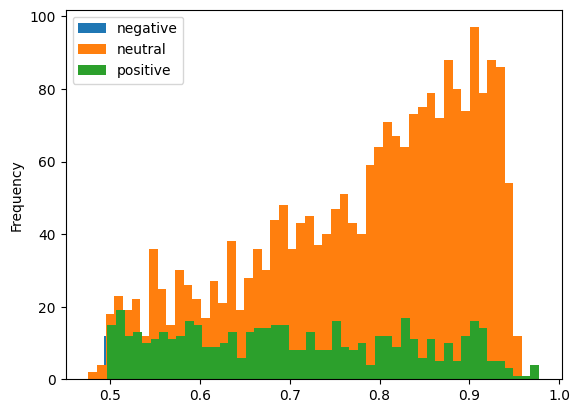

In [47]:
sent_df.groupby("label")["score"].plot(kind="hist", bins=50)
plt.legend()
plt.show()

In [48]:
sent_df.loc[sent_df["label"] == "negative", "score_"] = (sent_df.loc[sent_df["label"] == "negative"]["score"] * -1)

sent_df.loc[sent_df["label"] == "neutral", "score_"] = 0
sent_df.loc[sent_df["label"] == "positive", "score_"] = (sent_df.loc[sent_df["label"] == "positive"]["score"])
sent_df.sample(5)

,0,label,score,title,date,stock,score_
930142.0,"{'label': 'neutral', 'score': 0.8915253281593323}",neutral,0.891525,KeyBanc's Takeaways From Nvidia's Q1 Report,2018-05-11 09:19:00-04:00,NVDA,0.000000
930297.0,"{'label': 'neutral', 'score': 0.6533986926078796}",neutral,0.653399,KeyBanc Has Valuation Concerns With Nvidia's S...,2018-02-09 08:20:00-05:00,NVDA,0.000000
931396.0,"{'label': 'positive', 'score': 0.6646769642829...",positive,0.664677,Nvidia Might Be The Best Way To Play Virtual R...,2015-09-23 08:56:00-04:00,NVDA,0.664677
930031.0,"{'label': 'positive', 'score': 0.8257241249084...",positive,0.825724,NVIDIA shares are trading up 2.4% following co...,2018-08-20 14:55:00-04:00,NVDA,0.825724
930580.0,"{'label': 'positive', 'score': 0.6804792881011...",positive,0.680479,Mid-Afternoon Market Update: Dow Rises Over 50...,2017-09-15 14:31:00-04:00,NVDA,0.680479


<Axes: ylabel='Frequency'>

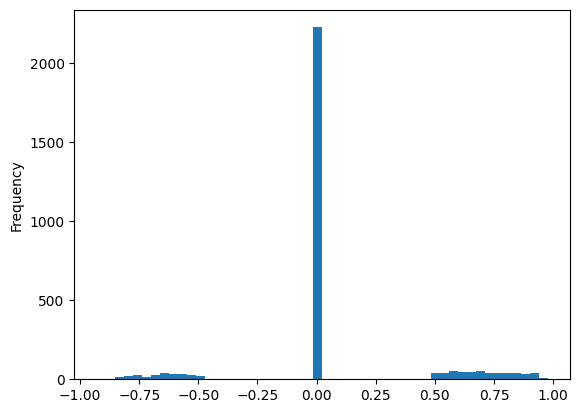

In [49]:
sent_df["score_"].plot(kind="hist", bins=50)

In [50]:
print(sent_df['date'].sample(10))
sent_df['Datetime']= pd.to_datetime(sent_df['date'], errors='coerce',utc=True)

931879.0    2012-06-11 12:22:00-04:00
929729.0    2019-03-19 13:21:00-04:00
931101.0    2016-11-11 10:23:00-05:00
931783.0    2012-12-12 09:03:00-05:00
930350.0    2018-01-19 12:11:00-05:00
929901.0    2018-11-19 12:04:00-05:00
931154.0    2016-09-16 12:28:00-04:00
929854.0    2019-01-02 10:59:00-05:00
930812.0    2017-05-09 16:25:00-04:00
930387.0    2017-12-23 10:52:00-05:00
Name: date, dtype: object


In [51]:
sent_df["Date"] = sent_df["Datetime"].dt.date

In [52]:
sent_daily = sent_df.groupby("Date")["score_"].mean()
sent_daily

Date
2011-08-12    0.007051
2011-08-15    0.000000
2011-08-23    0.116043
2011-08-27    0.592198
2011-08-31    0.000000
                ...   
2020-05-31    0.000000
2020-06-02    0.000000
2020-06-08    0.211167
2020-06-09    0.783235
2020-06-10    0.000000
Name: score_, Length: 1138, dtype: float64

In [53]:
tkr=yf.Ticker("NVDA")
history=tkr.history(period="15y")
hists["NVDA"]=history
Nvidia_df = hists["NVDA"].copy()
Nvidia_df = Nvidia_df.reset_index()
Nvidia_df["Date"] = Nvidia_df["Date"].dt.date
Nvidia_df = Nvidia_df.set_index("Date")
Nvidia_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-03,1.926424,1.960825,1.873677,1.944771,39694800,0.0,0.0
2009-02-04,1.949360,2.098428,1.949360,1.999814,77923200,0.0,0.0
2009-02-05,1.947065,2.169521,1.926424,2.146587,91919200,0.0,0.0
2009-02-06,2.153468,2.277309,2.116774,2.263549,115788000,0.0,0.0
2009-02-09,2.254376,2.286483,2.171815,2.233736,71612800,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-29,612.320007,624.890015,609.070007,624.650024,34873300,0.0,0.0
2024-01-30,629.000000,634.929993,622.599976,627.739990,41073500,0.0,0.0
2024-01-31,614.400024,622.690002,607.000000,615.270020,45379500,0.0,0.0


In [54]:
sent_and_stock = sent_daily.to_frame("Sentiment").merge(Nvidia_df, left_index=True, right_index=True)
sent_and_stock

,Sentiment,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2011-08-12,0.007051,3.403350,3.407937,2.905691,2.953851,319578400,0.0,0.0
2011-08-15,0.000000,2.983665,3.073107,2.967612,3.066226,86415200,0.0,0.0
2011-08-23,0.116043,2.804782,3.036412,2.800196,3.034119,93831200,0.0,0.0
2011-08-31,0.000000,3.160255,3.192362,3.027239,3.052467,70580800,0.0,0.0
2011-09-06,0.195406,2.866704,3.029533,2.839184,3.022653,69624800,0.0,0.0
...,...,...,...,...,...,...,...,...
2020-05-28,0.000000,83.845184,87.316210,83.516278,84.590225,73489600,0.0,0.0
2020-06-02,0.000000,87.672518,88.081163,86.294576,87.961563,39132000,0.0,0.0
2020-06-08,0.211167,88.520240,88.644885,86.610681,87.799797,38773600,0.0,0.0


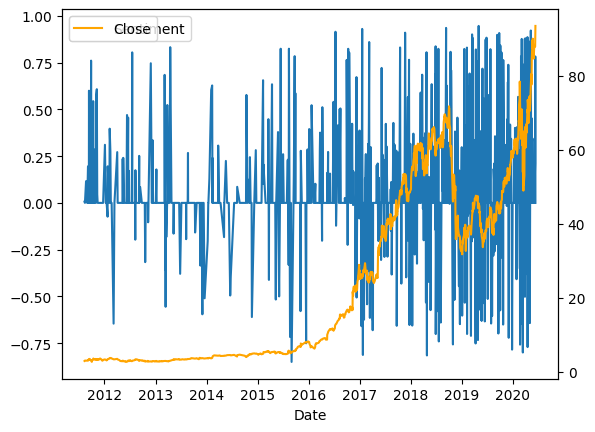

In [55]:
ax = sent_and_stock["Sentiment"].plot(legend="Sentiment")
ax2 = ax.twinx()
sent_and_stock["Close"].plot(ax=ax2, color="orange", legend="Closing Price")
plt.show()

In [56]:
hists["NVDA"]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-03 00:00:00-05:00,1.926424,1.960825,1.873677,1.944771,39694800,0.0,0.0
2009-02-04 00:00:00-05:00,1.949360,2.098428,1.949360,1.999814,77923200,0.0,0.0
2009-02-05 00:00:00-05:00,1.947065,2.169521,1.926424,2.146587,91919200,0.0,0.0
2009-02-06 00:00:00-05:00,2.153468,2.277309,2.116774,2.263549,115788000,0.0,0.0
2009-02-09 00:00:00-05:00,2.254376,2.286483,2.171815,2.233736,71612800,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-29 00:00:00-05:00,612.320007,624.890015,609.070007,624.650024,34873300,0.0,0.0
2024-01-30 00:00:00-05:00,629.000000,634.929993,622.599976,627.739990,41073500,0.0,0.0
2024-01-31 00:00:00-05:00,614.400024,622.690002,607.000000,615.270020,45379500,0.0,0.0


<Axes: xlabel='Date'>

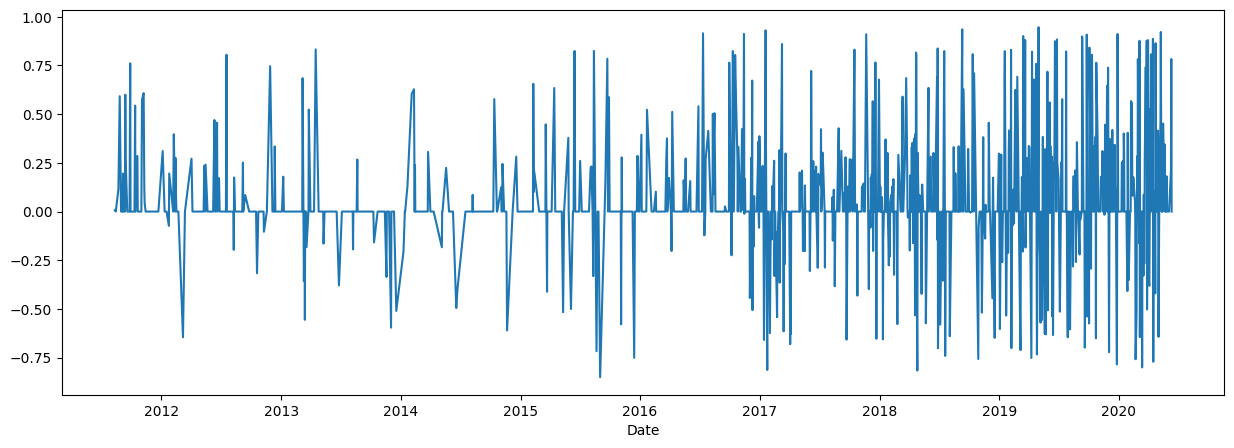

In [57]:
sent_df.groupby("Date")["score_"].mean().plot(figsize=(15,5))